In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Principal Component Analysis

Load and plot the "PCA.csv" data:

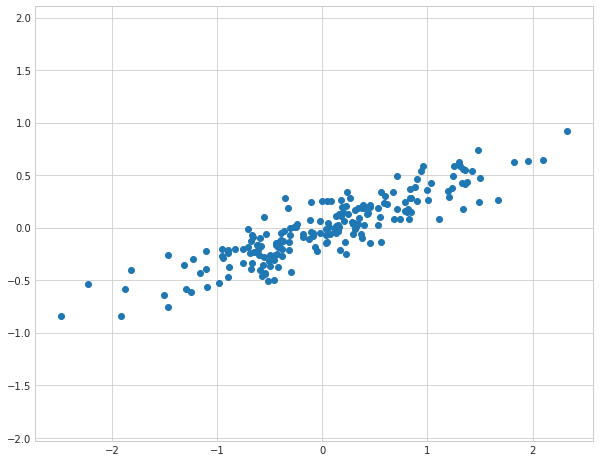

In [2]:
X1 = np.genfromtxt('PCA.csv',delimiter=',')
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    plt.scatter(X1[:, 0], X1[:, 1])
    plt.axis('equal');

Use sklearn's PCA to find 2 principal components on the X

In [3]:
from sklearn.decomposition import PCA
# TODO 
# Fit a PCA with 2 components on the X (n_components=2)
pca = PCA(n_components=2)
pca.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print(pca.components_)  #;print(pca.n_components)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Print the explained variance of the eigenvectors:

In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Draw the eigenvectors and the transformed datapoints:

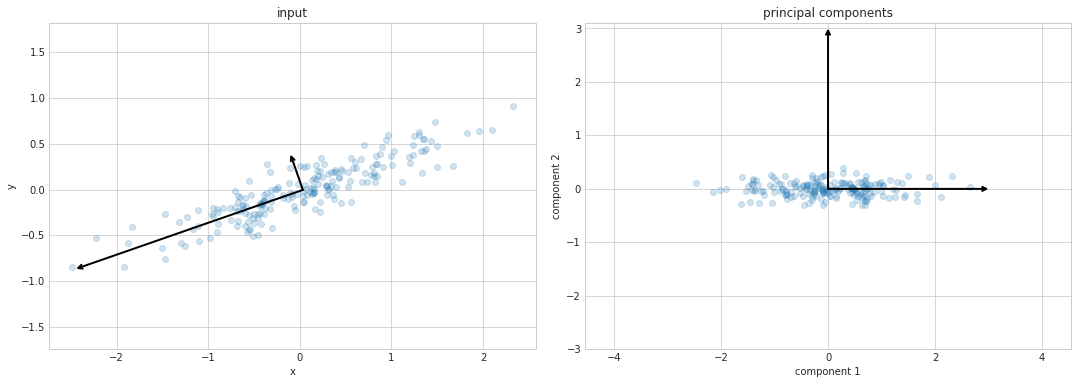

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

    # plot data
    ax[0].scatter(X1[:, 0], X1[:, 1], alpha=0.2)
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
    ax[0].axis('equal');
    ax[0].set(xlabel='x', ylabel='y', title='input')

    # plot principal components
    X_pca = pca.transform(X1)
    ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
    draw_vector([0, 0], [0, 3], ax=ax[1])
    draw_vector([0, 0], [3, 0], ax=ax[1])
    ax[1].axis('equal')
    ax[1].set(xlabel='component 1', ylabel='component 2',
              title='principal components',
              xlim=(-5, 5), ylim=(-3, 3.1))

Fit a sklearn PCA with only the first eigenvector:

In [7]:
pca = PCA(n_components=1)
pca.fit(X1)
X_pca = pca.transform(X1)
print("original shape:   ", X1.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Transform the X_pca back to 2 dimensions using pca.inverse_transform

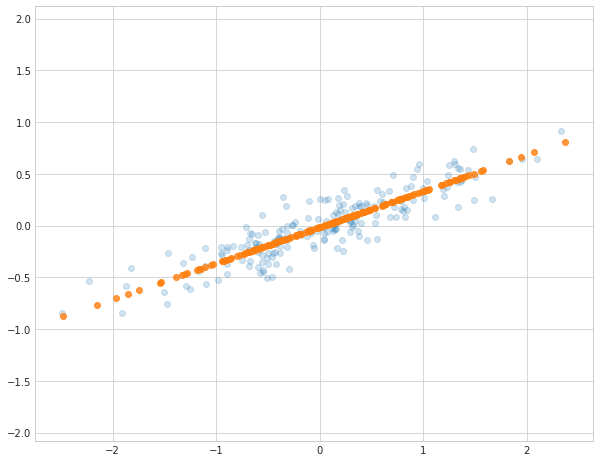

In [8]:
# TODO
# transform the X_pca back to two dimensions using pca.inverse_transform
X_new = pca.inverse_transform(X_pca)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal');

Load the Iris dataset

In [9]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


extract features and labels in X2 and y2

In [10]:
# TODO
# Extract features and labels
X2 = df.iloc[:,:-1].to_numpy()
y2 = df.iloc[:,-1].to_numpy()

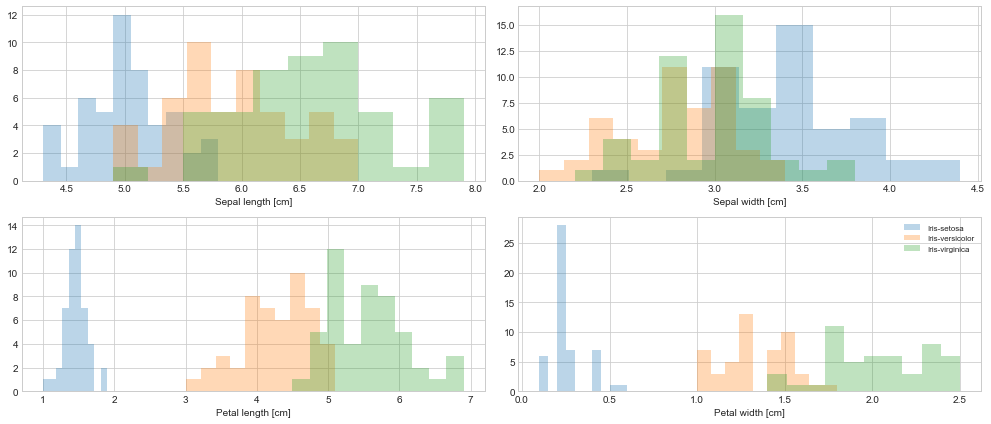

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import math

def plot_histograms(X, y):
  label_dict = {1: 'Iris-Setosa',
                2: 'Iris-Versicolor',
                3: 'Iris-Virgnica'}

  feature_dict = {0: 'Sepal length [cm]',
                  1: 'Sepal width [cm]',
                  2: 'Petal length [cm]',
                  3: 'Petal width [cm]'}

  with plt.style.context('seaborn-whitegrid'):
      plt.figure(figsize=(14, 6))
      for cnt in range(4):
          plt.subplot(2, 2, cnt+1)
          for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
              plt.hist(X[y==lab, cnt],
                       label=lab,
                       bins=10,
                       alpha=0.3,)
          plt.xlabel(feature_dict[cnt])
      plt.legend(loc='upper right', fancybox=True, fontsize=8)

      plt.tight_layout()
      plt.show()

plot_histograms(X2, y2)

Standardize the datapoints using StandardScaler:

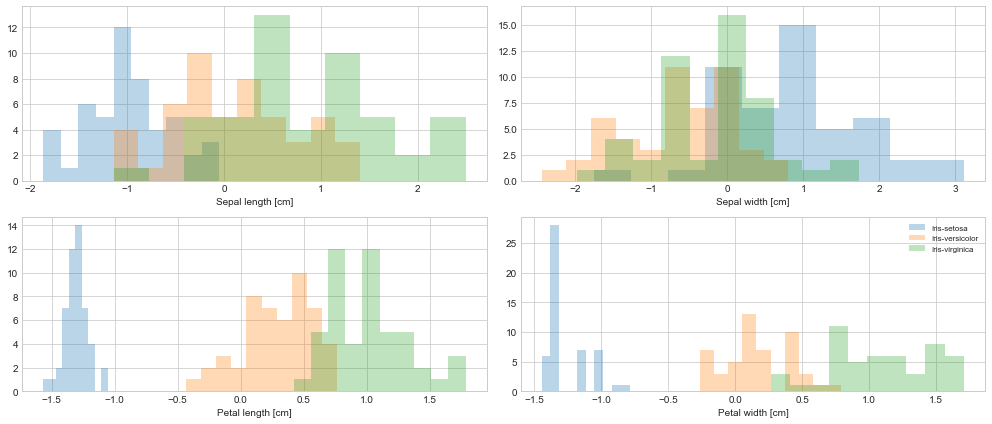

In [12]:
from sklearn.preprocessing import StandardScaler
# TODO
# Standardize the data and assign them to X_std
scaler = StandardScaler()
scaler.fit(X2)
X_std = scaler.transform(X2)
plot_histograms(X_std, y2)

Compute the covariance matrix

In [13]:
# TODO
# Complete the comput_cov using the formula given in the PDF file
def comput_cov(X):
    mean_vec = np.mean(X, axis=0)
    cov_mat = (1/X.shape[0]) * np.matmul(np.transpose(X-mean_vec), (X-mean_vec))
    return cov_mat
cov_mat = comput_cov(X_std)
print("Covariance matrix: \n%s" %comput_cov(X_std) )

Covariance matrix: 
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [14]:
from numpy import linalg as LA
def Sort_eigens(cov_mat):
    eig_vals, eig_vecs = LA.eig(cov_mat)  #;print(eig_vals.shape, eig_vecs.shape);print(eig_vals, eig_vecs)

    print('Eigenvectors \n%s' %eig_vecs)
    print('\nEigenvalues \n%s' %eig_vals)
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(eig_vals[i], eig_vecs[:,i]) for i in range(eig_vals.shape[0])]  #;print("here", eig_pairs)

    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort(reverse=True)  #key=lambda x: x[0], 
    return eig_pairs
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = Sort_eigens(cov_mat)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]
Eigenvalues in descending order:
2.9108180837520528
0.9212209307072242
0.14735327830509573
0.020607707235625487


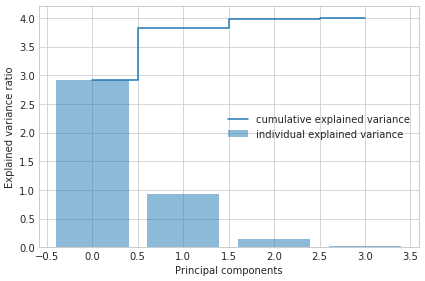

In [15]:
# TODO
# compute the explained and cumulative explained variance

k = 4  #num of components
var_exp = np.array([eig_pairs[i][0] for i in range(0, k)])  #eig_pairs[0]
cum_var_exp = np.cumsum(var_exp)
# print(var_exp);print(cum_var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


Implement MY_PCA() for full PCA procedure:

In [16]:
def My_PCA(X,n_components):
    cov_mat = comput_cov(X)
    eig_pairs = Sort_eigens(cov_mat)
    matrix_w = np.array([eig_pairs[i][1] for i in range(0, len((eig_pairs[0])[1]))])  # initialize matrix_w
    matrix_w = matrix_w[:,:n_components]# pick the first n eigen vectors from the sorted eig_pairs
    matrix_w = np.array(matrix_w)
    print('Matrix W:\n %s' %matrix_w)
    Z = np.matmul(X, matrix_w) # reduce the dimensions of X and assign them to Z
    return Z
Z = My_PCA(X2,2)

Eigenvectors 
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]

Eigenvalues 
[4.19667516 0.24062861 0.07800042 0.02352514]
Matrix W:
 [[ 0.36158968 -0.08226889]
 [-0.65653988 -0.72971237]
 [-0.58099728  0.59641809]
 [ 0.31725455 -0.32409435]]


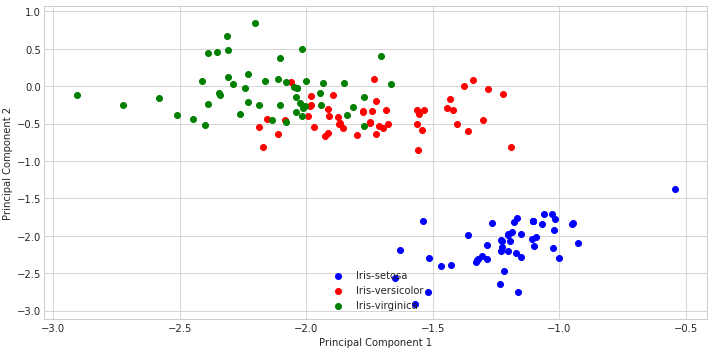

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 5))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Z[y2==lab, 0],
                    Z[y2==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()



Perform PCA from sklearn and see if the results match

In [18]:
# TODO
# use sklearn pca on iris data
sklearn_pca = PCA(n_components=2)
sklearn_pca.fit(X2)
Z_sklearn = sklearn_pca.transform(X2)

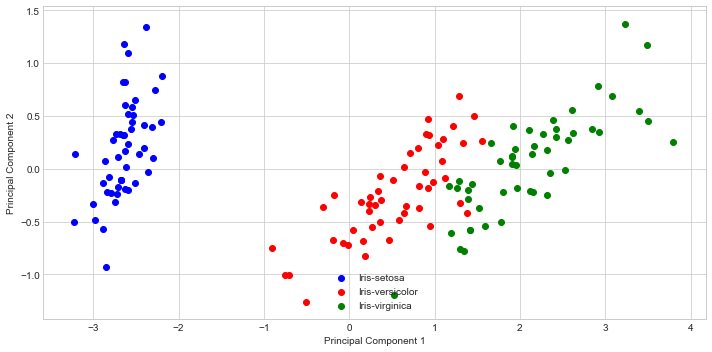

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 5))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Z_sklearn[y2==lab, 0],
                    Z_sklearn[y2==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

Perform your PCA on the X1 from the "PCA.csv" dataset with 1 dimension as well and compare it with X_pca 

Eigenvectors 
[[ 0.94446029 -0.32862557]
 [ 0.32862557  0.94446029]]

Eigenvalues 
[0.75871884 0.01838551]
Matrix W:
 [[ 0.94446029]
 [-0.32862557]]
X_pca and Z_My_PCA are equal!


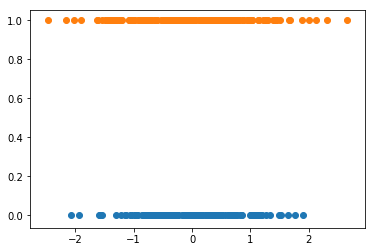

In [20]:
# TODO
# perform PCA with 1 principal component on the X1 and compare it with X_pca
Z_My_PCA = My_PCA(X1,1)
ax = plt.axes()
ax.scatter(Z_My_PCA,Z_My_PCA*0)
ax.scatter(X_pca,X_pca*0+1)
if (Z_My_PCA.all()==X_pca.all()):
    print("X_pca and Z_My_PCA are equal!")

# Autoencoders for dimensionality reduction

Load the fashion mnist.

In [21]:
from keras.datasets import fashion_mnist
(data, labels), (_, _) = fashion_mnist.load_data()

Using TensorFlow backend.


In [22]:
data = data.reshape(-1, 28*28) / 255. # scale the data features

In [23]:
print(data.shape)

(60000, 784)


In [24]:
from keras import models, layers
#TODO
# complete the function below for autoencoder
def dim_red_ae(data,n_dims_encoded=2):
    input_layer = layers.Input(shape=(data.shape[1],))
    encoding_layer = layers.Dense(n_dims_encoded,activation='tanh')(input_layer)
    decoding_layer = layers.Dense(data.shape[1],activation='tanh') (encoding_layer)
    autoencoder = models.Model(input_layer, decoding_layer)
    autoencoder.compile('adam', loss='mse')
    autoencoder.fit(x = data, y = data, epochs=5)
    encoder = models.Model(input_layer, encoding_layer)
    return encoder,autoencoder

In [25]:
encoder,autoencoder = dim_red_ae(data,n_dims_encoded=2)
encodings = encoder.predict(data)

Epoch 1/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0626
Epoch 2/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0473: 0s - loss: 0.04
Epoch 3/5
60000/60000 [==============================] - ETA: 0s - loss: 0.046 - 2s 34us/step - loss: 0.0466
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0464
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0463


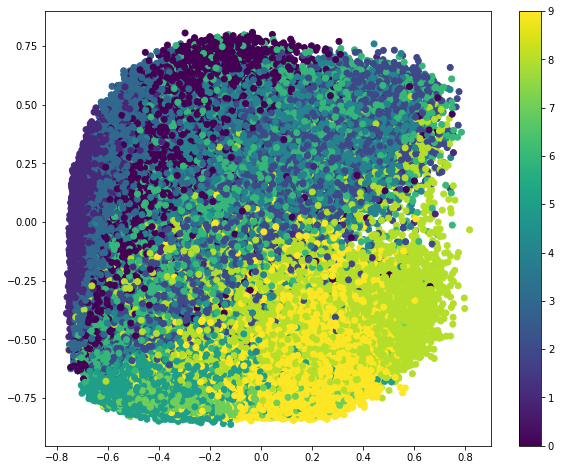

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(encodings[:, 0], encodings[:, 1], c=labels)
plt.colorbar()

<Figure size 720x720 with 0 Axes>

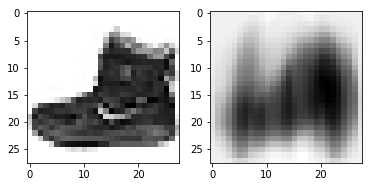

In [27]:
img = autoencoder.predict(data)
img = img[0].reshape(28,28)
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(1,2)
ax[0].imshow(data[0].reshape(28,28),cmap="Greys")
ax[1].imshow(img, cmap="Greys")

Train and run the autoencoder for 100 dimensions of the hidden layer:

Epoch 1/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.0186
Epoch 2/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.0111
Epoch 3/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0104
Epoch 4/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0101
Epoch 5/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0099


<Figure size 720x720 with 0 Axes>

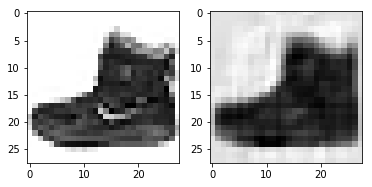

In [28]:
#TODO
encoder,autoencoder = dim_red_ae(data,n_dims_encoded=100)
img = autoencoder.predict(data)
img = img[0].reshape(28,28)
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(1,2)
ax[0].imshow(data[0].reshape(28,28),cmap="Greys")
ax[1].imshow(img, cmap="Greys")

In [29]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(data[:10000],labels[:10000])

In [30]:
#TODO
# train and predict a KNN with K=3 on the training and test set and measure the time it takes.
import time

KNN_start_L = time.time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
KNN_end_L = time.time()
print("Time Elapsed for Learning: ", KNN_end_L-KNN_start_L)

KNN_start_p = time.time()
y_pred = neigh.predict(X_test)
KNN_end_p = time.time()
print("Time Elapsed for Prediction: ", KNN_end_p-KNN_start_p)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Time Elapsed for Learning:  0.5202689170837402
Time Elapsed for Prediction:  23.02728009223938
Accuracy:  0.8264


perform cross validation to find the best number of hidden dimensions for hidden layer for dimensionality recudtion:

In [31]:
from sklearn.model_selection import cross_val_score
# TODO
# Perform K-fold cross validation with 5 folds to find the best number of hidden dimensions of autoencoder 
# for dimentionality reduction
acc_list = []
possible_dims = [2,5,7,10,15,20]
for dims in possible_dims:
    print("training for %d dimensions"%dims)
    knn = KNeighborsClassifier(n_neighbors=3)
    _,autoencoder = dim_red_ae(X_train,n_dims_encoded=dims)
    img = autoencoder.predict(X_train)
    scores = cross_val_score(knn, img, y_train, cv=5, scoring='accuracy')
    acc_list.append(np.amax(scores))
    print("for %d dims scores are :"%dims,scores)
    print("=========================================")
best_dim = possible_dims[acc_list.index(max(acc_list))];print("best_dim: ", best_dim)

training for 2 dimensions
Epoch 1/5
7500/7500 [==============================] - 0s 46us/step - loss: 0.1195
Epoch 2/5
7500/7500 [==============================] - 0s 38us/step - loss: 0.0727
Epoch 3/5
7500/7500 [==============================] - 0s 43us/step - loss: 0.0596
Epoch 4/5
7500/7500 [==============================] - 0s 40us/step - loss: 0.0535
Epoch 5/5
7500/7500 [==============================] - 0s 39us/step - loss: 0.0508
for 2 dims scores are : [0.48369927 0.46333333 0.50500334 0.48098732 0.47765177]
training for 5 dimensions
Epoch 1/5
7500/7500 [==============================] - 0s 44us/step - loss: 0.0966
Epoch 2/5
7500/7500 [==============================] - 0s 44us/step - loss: 0.0550
Epoch 3/5
7500/7500 [==============================] - 0s 36us/step - loss: 0.0449
Epoch 4/5
7500/7500 [==============================] - 0s 42us/step - loss: 0.0412
Epoch 5/5
7500/7500 [==============================] - 0s 47us/step - loss: 0.0390
for 5 dims scores are : [0.66666667 0

perform model evaluation with best_dim on the test set and measure the time of training and predicting of KNN (K=3)

In [32]:
# TODO
# model evaluation on the test set.
knn = KNeighborsClassifier(n_neighbors=3)

_,autoencoder = dim_red_ae(X_train,n_dims_encoded=best_dim)
img = autoencoder.predict(X_train)

KNN_start_L = time.time()
knn.fit(img,y_train)
KNN_end_L = time.time()
print("Time Elapsed for Learning: ", KNN_end_L-KNN_start_L)

test_img = autoencoder.predict(X_test)

KNN_start_p = time.time()
y_pred = neigh.predict(X_test)
KNN_end_p = time.time()
print("Time Elapsed for Prediction: ", KNN_end_p-KNN_start_p)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Epoch 1/5
7500/7500 [==============================] - 0s 50us/step - loss: 0.0653
Epoch 2/5
7500/7500 [==============================] - 0s 45us/step - loss: 0.0347
Epoch 3/5
7500/7500 [==============================] - 0s 53us/step - loss: 0.0289
Epoch 4/5
7500/7500 [==============================] - 0s 66us/step - loss: 0.0261
Epoch 5/5
7500/7500 [==============================] - 0s 58us/step - loss: 0.0245
Time Elapsed for Learning:  0.3628087043762207
Time Elapsed for Prediction:  24.658313274383545
Accuracy:  0.8264
